In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification

In [2]:
# Load the dataset
df = pd.read_csv("C://Users//Avadhoot//Downloads//ml//train.csv")

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
df=df.fillna('')
df=df.drop(['id', 'title', 'author'], axis=1)
df.head()

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1


In [5]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Avadhoot\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re

port_stem=PorterStemmer()
port_stem
port_stem.stem("Hi thIs is Avdut * % %@@@")

'hi this is avdut * % %@@@'

In [7]:
# Preprocess the text data
stemmer = SnowballStemmer(language='english')

In [8]:
def stem_text(text):
    stemmed_words = [stemmer.stem(word) for word in text.split()]
    return ' '.join(stemmed_words)

df['text'] = df['text'].apply(stem_text)

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(df['text'])

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(tfidf, df['label'], test_size=0.2, random_state=42)

In [10]:
# Train and evaluate the Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)
dtc_acc = accuracy_score(y_test, dtc_pred)
print("Decision Tree Classifier Accuracy:", dtc_acc)

Decision Tree Classifier Accuracy: 0.8875


In [11]:
# Train and evaluate the Linear Support Vector Classifier
svc = LinearSVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, svc_pred)
print("Linear Support Vector Classifier Accuracy:", svc_acc)

Linear Support Vector Classifier Accuracy: 0.9610576923076923


In [12]:
#IT TAKES AROUND 40 MINUTES TO SHOW RESULT
# Train and evaluate the Multi-layer Perceptron Classifier
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
mlp_acc = accuracy_score(y_test, mlp_pred)
print("Multi-layer Perceptron Classifier Accuracy:", mlp_acc)

Multi-layer Perceptron Classifier Accuracy: 0.9608173076923077


In [13]:
# Train and evaluate the Passive Aggressive Classifier
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(X_train, y_train)
pac_pred = pac.predict(X_test)
pac_acc = accuracy_score(y_test, pac_pred)
print("Passive Aggressive Classifier Accuracy:", pac_acc)

Passive Aggressive Classifier Accuracy: 0.9617788461538461


In [14]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
ensemble_model = VotingClassifier(estimators=[('dt', dtc), ('svc', svc), ('mlp', mlp), ('pac', pac)], voting='hard')

In [15]:
#It takes 23 minutes to show result
#it took 29 minutes for second time
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('dt', DecisionTreeClassifier()),
                             ('svc', LinearSVC()), ('mlp', MLPClassifier()),
                             ('pac', PassiveAggressiveClassifier(max_iter=50))])

In [16]:
y_pred_ensemble = ensemble_model.predict(X_test)

In [17]:
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)

In [18]:
print('Accuracy:', accuracy_ensemble)

Accuracy: 0.9658653846153846


In [55]:
# Calculate precision, recall, and F1 score for your ensemble model
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred_ensemble)

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1_score}")
print(f"Support: {support}")


Precision: [0.96495327 0.96683168]
Recall: [0.96857411 0.96301775]
F1-score: [0.9667603  0.96492095]
Support: [2132 2028]


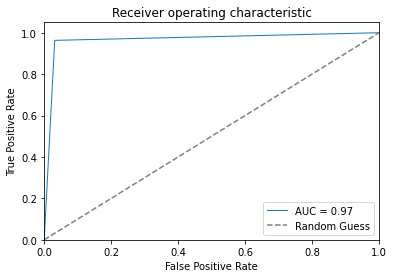

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_pred_ensemble are already defined

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_ensemble)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, lw=1, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], '--', color='gray', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [19]:
print(len(y_test))

4160


In [20]:
from sklearn.metrics import roc_curve, roc_auc_score

# calculate FPR, TPR, and thresholds for ensemble model
fpr_ensemble, tpr_ensemble, thresholds_ensemble = roc_curve(y_test, y_pred_ensemble)



In [51]:
# Assuming your test data and predicted labels are stored in test_data and predicted_labels respectively

# Get predicted probabilities instead of predicted labels
y_pred_prob = model.predict_proba(X_test)[:,1]

# Calculate precision, recall and f1-score
report = classification_report(y_test, y_pred_labels)
print(report)

# Plot ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_labels)
# roc_auc = auc(fpr, tpr)
# plt.figure()
# lw = 2
# plt.plot(fpr, tpr, color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver operating characteristic')
# plt.legend(loc="lower right")
# plt.show()


NameError: name 'model' is not defined

In [ ]:
# y_pred_labels = np.where(y_pred_ensemble >= 0.5, 1, 0)
# report = classification_report(y_test, y_pred_labels)
# y_test, y_pred_labels

In [22]:
from sklearn.ensemble import AdaBoostClassifier

# Create the ensemble model
ensemble_model_ada = VotingClassifier(estimators=[('dt', dtc), ('svc', svc), ('mlp', mlp), ('pac', pac)], voting='hard')


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_sample_weight

# compute sample weights
weights_train = compute_sample_weight(class_weight='balanced', y=y_train)

class WeightedRandomForestClassifier(RandomForestClassifier):
    def fit(self, X, y, sample_weight=None):
        if sample_weight is not None:
            self.sample_weight = sample_weight
        super().fit(X, y)
        
ensemble_model_ada = WeightedRandomForestClassifier(n_estimators=10, max_depth=5, random_state=42)
ada_boost_model = AdaBoostClassifier(base_estimator=ensemble_model_ada, n_estimators=50, learning_rate=1.0, algorithm='SAMME')
ada_boost_model.fit(X_train, y_train, sample_weight=weights_train)




AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=WeightedRandomForestClassifier(max_depth=5,
                                                                 n_estimators=10,
                                                                 random_state=42))

In [24]:
# Make predictions on the test data
y_pred_ada = ada_boost_model.predict(X_test)

# Calculate accuracy
accuracy_ada = accuracy_score(y_test, y_pred_ada)
print('Accuracy:', accuracy_ada)

Accuracy: 0.7757211538461538


In [ ]:
# from sklearn.ensemble import BaggingClassifier

# # Train and evaluate the Bagging Classifier
# bagging = BaggingClassifier(base_estimator=ensemble_model, n_estimators=10)
# bagging.fit(X_train, y_train)
# bagging_pred = bagging.predict(X_test)
# bagging_acc = accuracy_score(y_test, bagging_pred)
# print("Bagging Classifier Accuracy:", bagging_acc)

In [ ]:
# import matplotlib.pyplot as plt


# # Create a list of model names
# models = ['Decision Tree', 'SVM', 'MLP', 'Passive Aggressive', 'Ensemble', 'Bagging', 'Ada Boosting']

# # Create a list of accuracy scores
# scores = [dtc_acc, svc_acc, mlp_acc, pac_acc, accuracy_ensemble, bagging_acc, accuracy_ada]

# # Create a scatter plot
# plt.scatter(models, scores)

# # Connect the points with a line
# plt.plot(models, scores)

# # Rotate the x-tick labels by 90 degrees
# plt.xticks(rotation=90)

# # Add labels to the x-axis and y-axis
# plt.xlabel('Model')
# plt.ylabel('Accuracy')

# # Set the title of the graph
# plt.title('Accuracy Scores for Different Models')

# # Display the graph
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# # Create a list of model names
# models = ['Decision Tree', 'SVM', 'MLP', 'Passive Aggressive', 'Ensemble', 'Bagging', 'Ada Boosting']

# # Create a list of accuracy scores
# scores = [dtc_acc, svc_acc, mlp_acc, pac_acc, accuracy_ensemble, bagging_acc, accuracy_ada]

# # Create a bar plot
# plt.bar(models, scores)

# # Add labels to the x-axis and y-axis
# plt.xlabel('Model')
# plt.ylabel('Accuracy')

# # Rotate the x-tick labels by 90 degrees
# plt.xticks(rotation=90)

# # Set the title of the graph
# plt.title('Accuracy Scores for Different Models')

# # Display the graph
# plt.show()


In [ ]:
# import pandas as pd
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.ensemble import VotingClassifier

# # Load the test data
# test_df = pd.read_csv("C://Users//Avadhoot//Downloads//ml//test.csv")

# # Replace missing values with empty strings
# test_df['text'] = test_df['text'].fillna('')

# # Preprocess the text data
# test_df['text'] = test_df['text'].apply(stem_text)

# # Use the TfidfVectorizer to transform the test data
# test_tfidf = tfidf_vectorizer.transform(test_df['text'])

# # Make predictions using the ensemble model
# predictions = ensemble_model.predict(test_tfidf)

# # Save the predictions to a file
# output_df = pd.DataFrame({'id': test_df['id'], 'target': predictions})
# output_df.to_csv("predictions.csv", index=False)


In [ ]:
import os
print(os.getcwd())


In [ ]:
#DATA VISUALIZATION

In [77]:
# Load the dataset
df1 = pd.read_csv("C://Users//Avadhoot//Downloads//ml//train.csv")
df11 = df.head(10)

<AxesSubplot:xlabel='label', ylabel='Count'>

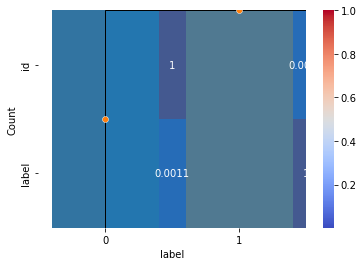

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a heatmap to show the correlation between the attributes
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Plot a bar chart to show the distribution of labels
sns.countplot(x='label', data=df)

# Plot a histogram to show the distribution of text lengths
ax = sns.histplot(df['text'].apply(len))
ax.set_ylabel('Count', rotation=450)

# Plot a scatterplot to show the relationship between text length and label
sns.scatterplot(x='text', y='label', data=df1)


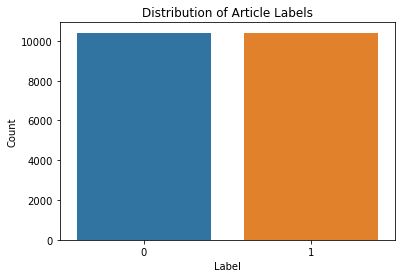

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='label', data=df1)
plt.title('Distribution of Article Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


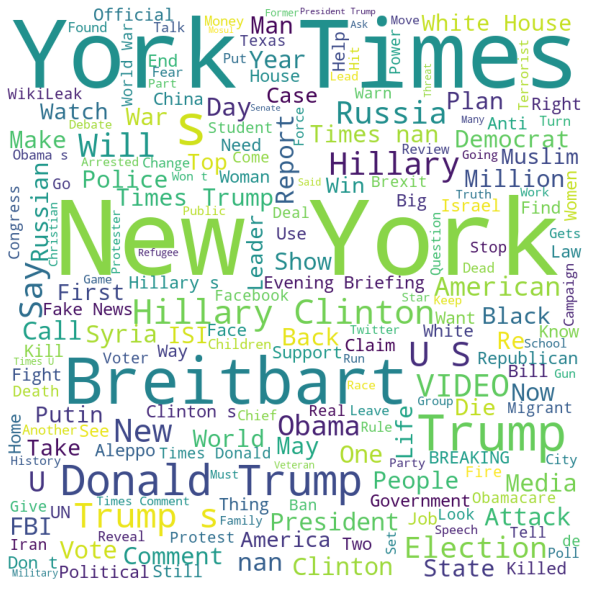

In [38]:
#!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS


title_text = ' '.join(df1['title'].astype(str).tolist())

wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=STOPWORDS, min_font_size=10).generate(title_text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


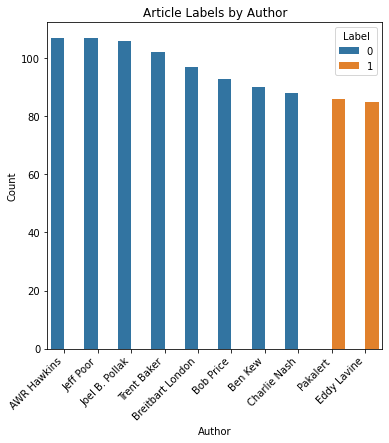

In [75]:
plt.figure(figsize=(6, 6))
sns.countplot(x='author', hue='label', data=df1, order=df1['author'].value_counts().iloc[10:20].index)
plt.xticks(rotation=45, ha='right')
plt.title('Article Labels by Author')
plt.xlabel('Author')
plt.ylabel('Count')
plt.legend(title='Label')
plt.show()

# # create a list of authors to exclude
# excluded_authors = ['Pam Key', 'Jerome Hudson','Charlie Spiering','John Hayward','Katherine Rodriguez','Warner Todd Huston','Ian Hanchett','Brietbart News','Daniel Nussbaum']

# # filter the dataframe to exclude the rows corresponding to the excluded authors
# filtered_df = df1[~df1['author'].isin(excluded_authors)]

# # create the countplot with the filtered dataframe
# plt.figure(figsize=(6, 6))
# sns.countplot(x='author', hue='label', data=filtered_df, order=filtered_df['author'].value_counts().iloc[:10].index)
# plt.xticks(rotation=45, ha='right')
# plt.title('Article Labels by Author')
# plt.xlabel('Author')
# plt.ylabel('Count')
# plt.legend(title='Label')
# plt.show()

